In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import gdown
import pandas as pd

file_id = '1lwmokQo-3nw9SyrwxeljcAQlWvnEQ4OT'
output_file = 'Clustering_Data.csv'

# URL for the file
download_url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(download_url, output_file, quiet=False)
clusteringset = pd.read_csv(output_file, sep=',')
clusteringset = pd.read_csv(output_file, sep=',')

Downloading...
From: https://drive.google.com/uc?id=1lwmokQo-3nw9SyrwxeljcAQlWvnEQ4OT
To: /content/Clustering_Data.csv
100%|██████████| 11.5k/11.5k [00:00<00:00, 23.6MB/s]


In [ ]:
clusteringset = clusteringset.drop(['Customer_Segment'],axis=1)
clusteringset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
def mean_normalization(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data

In [ ]:
def initialize_centroids(clusteringset, k):
    indices = np.random.choice(clusteringset.shape[0], k, replace=False)
    return clusteringset[indices]

In [ ]:
def k_means(clusteringset, k, max_iters=100):
    # Convert clusteringset to a NumPy array for NumPy-style indexing
    clusteringset_np = clusteringset.to_numpy()
    centroids = initialize_centroids(clusteringset_np, k)

    for _ in range(max_iters):
        distances = np.linalg.norm(clusteringset_np[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([
            clusteringset_np[labels == i].mean(axis=0)
            for i in range(k)
        ])
        centroids = new_centroids
    return centroids, labels

In [ ]:
features = clusteringset.select_dtypes(include=[np.number])
def costfunction(clusteringset, k):
    # Convert to NumPy array here as well to maintain consistency
    clusteringset_np = clusteringset.to_numpy()
    centroids, labels = k_means(clusteringset, k)
    total_distance = np.sum([
        np.sum(np.linalg.norm(clusteringset_np[np.where(labels == i)] - centroids[i], axis=1) ** 2)
        for i in range(k)
    ])
    return total_distance / len(clusteringset_np)

# Elbow method to find the optimal number of clusters
k_values = range(1, 10)
inertias = [costfunction(features, k) for k in k_values]

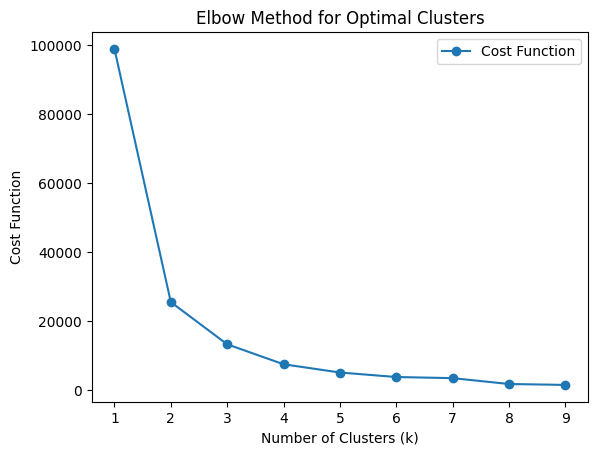

In [ ]:
plt.plot(k_values, inertias, marker='o', label="Cost Function")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost Function")
plt.legend()
plt.show()

In [ ]:
optimal_k = 3
centroids, labels = k_means(features, optimal_k, max_iters=10)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)
reduced_centroids = pca.transform(centroids)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


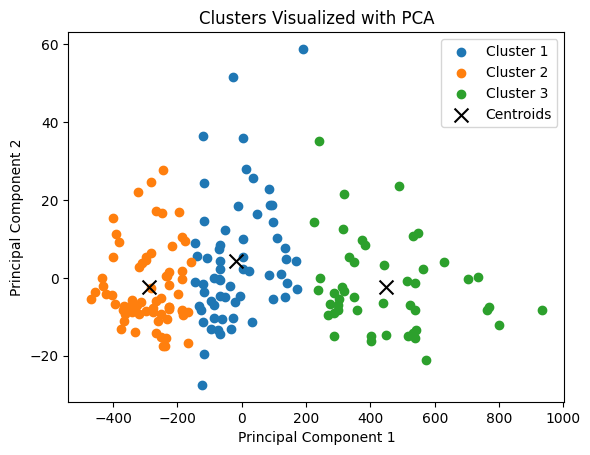

In [ ]:
for i in range(optimal_k):
    plt.scatter(reduced_features[np.where(labels == i), 0], reduced_features[np.where(labels == i), 1], label=f"Cluster {i+1}")
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], color='black', marker='x', s=100, label="Centroids")
plt.title("Clusters Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()